# Serie 11 
### (=Block 10)

## Aufgabe 11.1

Wir kommen nochmals auf die Datei Diet.csv zurück, in der die Ergebnisse der Studie mit 76 Personen zusammengestellt sind. Diese Probanden haben jeweils eine der Diäten 1,2 oder 3 während 6 Wochen gemacht.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/Diet.csv')

df['weight_loss'] = df['weight6weeks'] - df['pre.weight']

df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,0,41,171,60,2,60.0,0.0
1,26,0,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,-3.8
3,2,0,46,192,60,1,54.0,-6.0
4,3,0,55,170,64,1,63.3,-0.7


Es gibt neben der Diät noch einen weiteren Faktor, nämlich gendermit Stufen Mann (0) und Frau (1). Wir wollen untersuchen, ob Männer und Frauen unterschiedlich auf die Diäten reagieren.

a) Erstellen Sie zunächst einen Boxplot und einen Stripchart (siehe letzte Übungsserie) mit weight.lossund gender. Wie interpretieren Sie diese?

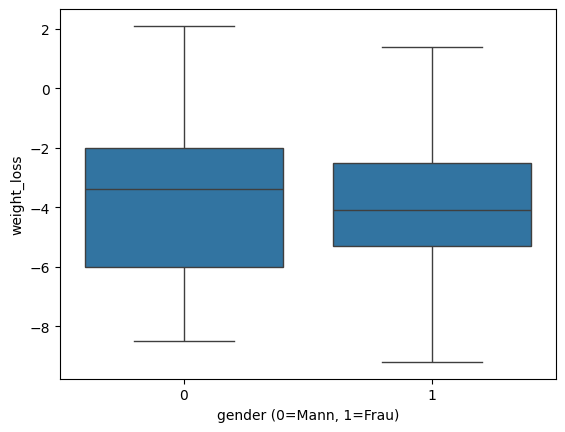

In [2]:
# Boxplot
import seaborn as sns
sns.boxplot(x="gender", y="weight_loss", data=df)
plt.xlabel("gender (0=Mann, 1=Frau)")
plt.ylabel("weight_loss")
plt.show()

Kaum ein Unterschied zwischen den Geschlechtern ist erkennbar. Beide haben in etwa denselben Median. Das Geschlecht hat also anscheinend auf den Gewichtsverlust keinen Einﬂuss.

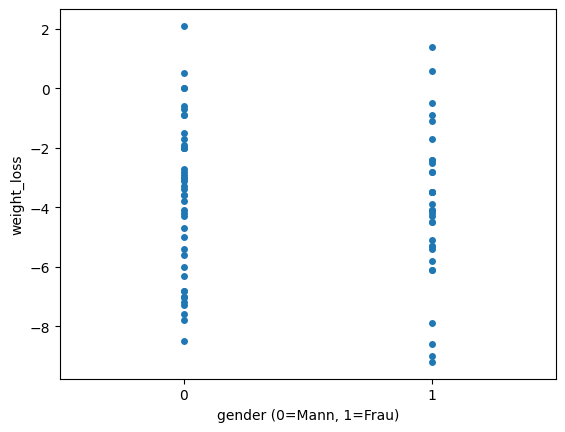

In [3]:
# Stripchart
import seaborn as sns
sns.stripplot(x="gender", y="weight_loss", data=df, jitter=False)
plt.xlabel("gender (0=Mann, 1=Frau)")
plt.ylabel("weight_loss")
plt.show()

Auch hier, kaum ein Unterschied zwischen den Geschlechtern ist erkennbar. 

b) Erstellen Sie folgenden Interaction-Plot, und interpretieren Sie diesen.


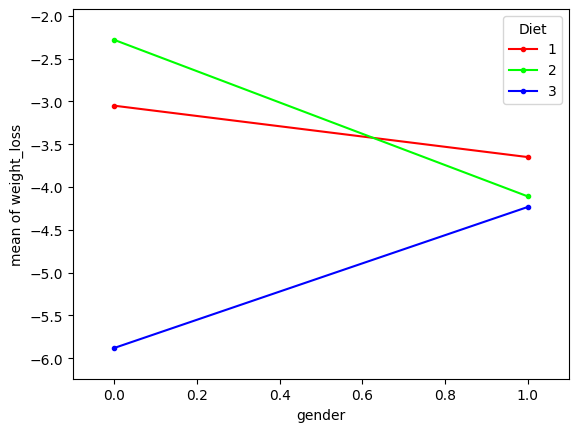

In [4]:
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(x=df['gender'], trace=df['Diet'], response=df['weight_loss'])
plt.show()

Der Interaction Plot zeigt, dass der Effekt der unterschiedlichen Diäten bei Männern einen grösseren Einfluss hat als bei Frauen. Bei Männern zeigt die Diät Nr. 3 einen deutlich grössere Wirkung als die Diät 1 und 2.  
Bei den Frauen erziehlen alle 3 Diäten ungefähr die selbe Wirkung.

Die Geraden verlaufen nicht parallel, dies deutet auf Wechselwirkungen hin.  



c) Was geschieht, wenn Sie genderund Dietvertauschen? Interpretieren Sie diesen Plot.

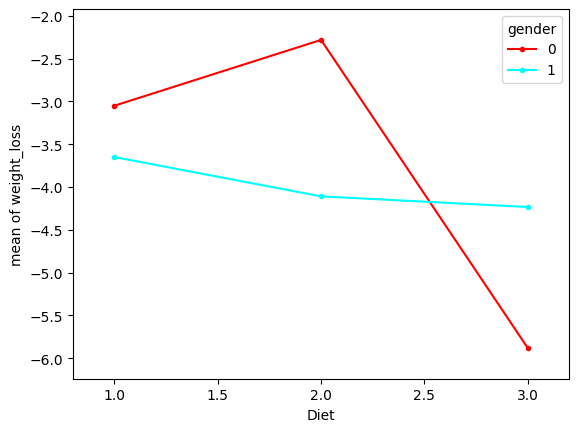

In [5]:
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(x=df['Diet'], trace=df['gender'], response=df['weight_loss'])
plt.show()

Das Fazit bleibt gleich.  
Die Gerade für die Gewichtsabnahme der Frauen verläuft annähernd Horizontal. Dies deutet auf keine grosse Einwirkungen der Diät Methode auf die Gewichtsabnahme hin.  
Die Kurve bei den Männern zeigt ein anderes bild, die Kurve ist nicht Horizontal was darauf hinweist, dass es Unterschiede in den unterschiedlichen Methoden gibt.  
Auch in diesem Beispiel verlaufen die beiden Kurven nicht parallel, was auf Wechselwirkungen hinweist.

d) Führen Sie einen Anova-Hypothesentest ohne Wechselwirkung auf Signiﬁkanzniveau von 5 % durch. Stellen Sie die beiden Nullhypothesen auf, und interpretieren Sie die p-Werte.

In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fit = ols("weight_loss~C(gender,Sum)+C(Diet)", data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(gender, Sum)",1.0,1.658524,1.658524,0.28599,0.594405
C(Diet),2.0,70.470330,35.235165,6.07582,0.003604
Residual,74.0,429.144095,5.799245,NaN,NaN


Nullhypothesen: 
- Männer und Frauen haben denselben durschnittlichen Gewichtsverlust
- Alle drei Diäten führen zum gleichen durschnittlichen Gewichtsverlust

Auswertung: 
- Gender:   P-Wert: 0.594 und liegt damit deutlich über dem Signifikanzniveau von 0.05. Die Nullhypothese wird somit nicht verworfen. Der durchschnittliche Gewichtsverlust ist bei Frauen und Männern gleich. 
- Diät      P-Wert: 0.0036 und liegt damit deutlich unter dem Signifikanzniveau  von 0.05. Die Nullhypothese wird somit verworfen. Die Unterschiede zwischen den Diäten sind statistisch signiﬁkant.

e) Führen Sie denselben Test nun mit Wechselwirkung durch. Interpretieren Sie wiederum die entsprechenden Resultate.

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fit = ols("weight_loss~C(gender,Sum)*C(Diet)", data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(gender, Sum)",1.0,1.658524,1.658524,0.307590,0.580882
C(Diet),2.0,70.470330,35.235165,6.534709,0.002467
"C(gender, Sum):C(Diet)",2.0,40.919962,20.459981,3.794506,0.027118
Residual,72.0,388.224133,5.392002,NaN,NaN


Nullhypothesen: 
- Männer und Frauen haben denselben durschnittlichen Gewichtsverlust (Identisch wie zuvor)
- Alle drei Diäten führen zum gleichen durschnittlichen Gewichtsverlust (Identisch wie zuvor)
- Geschlecht und Diäten zeigen keine Wechselwirkung. Das heisst, Männer und Frauen reagieren gleich auf die entsprechenden Diäten.

Auswertung: 
- Gender:   P-Wert: 0.581 und liegt damit deutlich über dem Signifikanzniveau von 0.05. Die Nullhypothese wird somit nicht verworfen. Der durchschnittliche Gewichtsverlust ist bei Frauen und Männern gleich. 
- Diät:      P-Wert: 0.0025 und liegt damit deutlich unter dem Signifikanzniveau  von 0.05. Die Nullhypothese wird somit verworfen. Die Unterschiede zwischen den Diäten sind statistisch signiﬁkant.
- WW Diät / Gender:  P-Wert: 0.0271  und liegt und liegt unter dem Signiﬁkanzniveau. Die Nullhypothese wird somit verworfen. Es gibt eine statistisch signiﬁkante Wechselwirkung. Männer und Frauen reagieren also nicht gleich auf die jeweiligen Diäten.

# Aufgabe 11.2

Die Daten mathGender.datstammen aus einer Beobachtungsstudie um die Beziehung zwischen dem Resultat beim ACT Math Usage Test und den beiden Variablen 
Geschlecht (1=female, 2=male) und Level der erbrachten Mathematikkurse (1=algebra only, 2=algebra+geometry, 3=through calculus) zu untersuchen.
Es wurden 861 high school seniors untersucht. Die Resultate, ACT score, gehen von 0 to 36 mit einem Median von 15 und einem Durchschnitt von 15.33.
Untersuchen Sie wie in Aufgabe 1 die Beziehung von ACT score und dem Geschlecht und den mathematischen Vorkenntnissen. Verwenden Sie dazu Boxplots, Stripcharts, 
Interaction-Plots und Hypothesentests. Interpretieren Sie jeweils Ihre Resultate. Lesen Sie Datei folgendermassen ein:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'data/mathGender.dat', sep=' ')

df.head()

,score,courses,gender
0,5,1,2
1,13,1,2
2,7,1,2
3,20,1,2
4,11,1,2


### Boxplots und Scrippcharts für Geschlecht

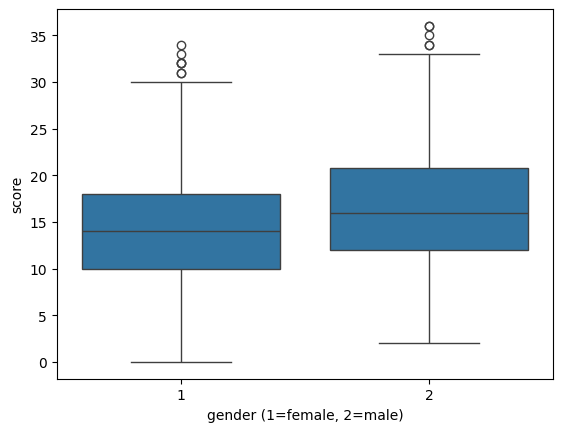

In [9]:
# Boxplots Geschlecht: 
import seaborn as sns

sns.boxplot(x="gender", y="score", data=df)
plt.xlabel("gender (1=female, 2=male)")
plt.ylabel("score")
plt.show()

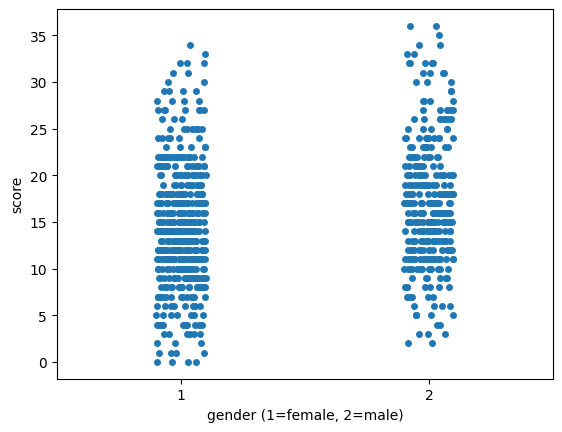

In [10]:
# Stripchart:

sns.stripplot(x="gender", y="score", data=df)
plt.xlabel("gender (1=female, 2=male)")
plt.ylabel("score")
plt.show()

Die Unterschiede scheinen wenig markant. Die Frauen haben einen etwas schlechteren Median und Durchschnitt.  

### Boxplots und Scrippcharts für Vorkentnisse

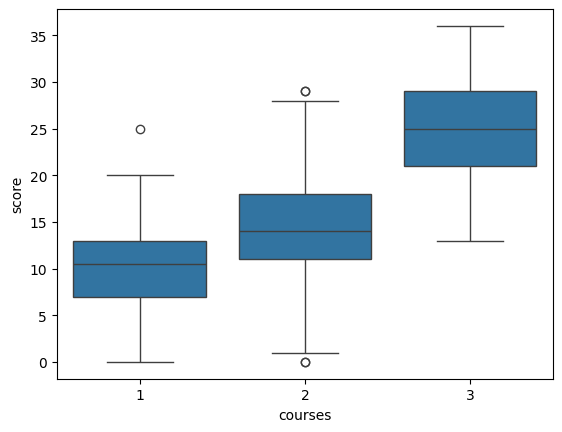

In [11]:
# Boxplots Vorkentnisse: 
import seaborn as sns

sns.boxplot(x="courses", y="score", data=df)
plt.xlabel("courses")
plt.ylabel("score")
plt.show()

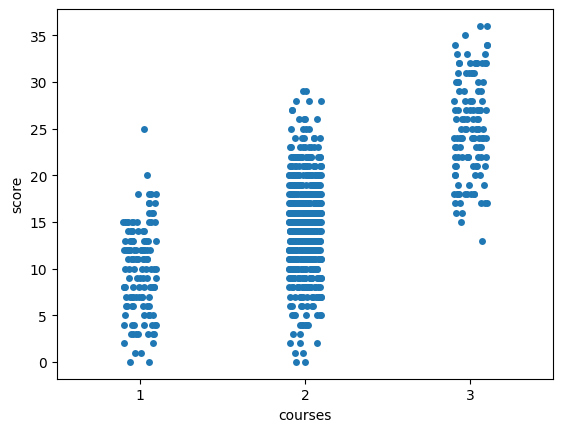

In [12]:
# Stripcharts Vorkentnisse: 
import seaborn as sns

sns.stripplot(x="courses", y="score", data=df)
plt.xlabel("courses")
plt.ylabel("score")
plt.show()

Es scheint in der Tat Unterschiede in den Resultaten zu geben. Dies ist aber nicht weiter erstaunlich, da die Studierenden mit mehr mathematischen Vorkenntnissen bevorteilt sind. Sind die Unterschiede aber signiﬁkant?

### Interaction plot

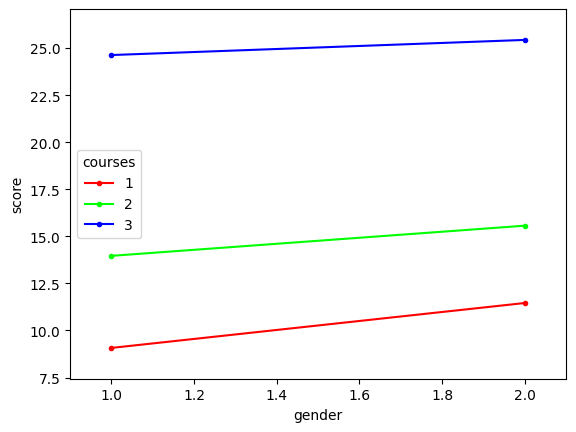

In [13]:
interaction_plot(x=df["gender"], trace=df["courses"], response=df["score"], 
legendtitle="courses")

plt.xlabel("gender") 
plt.ylabel("score")

plt.show()

Unabhängig von den Vorkenntnissen schneiden die Männer leicht besser ab, als die Frauen. Es gibt aber offensichtlich Unterschiede, wenn man die Vorkenntnisse betrachtet werden. Die Linien liegen weit auseinander.

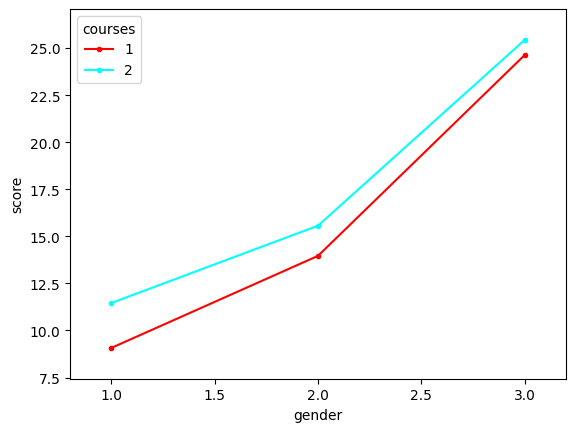

In [14]:
interaction_plot(x=df["courses"], trace=df["gender"], response=df["score"], 
legendtitle="courses")

plt.xlabel("gender") 
plt.ylabel("score")

plt.show()

Auch hier sehen wir, dass die Gruppenmittelwerte der drei Levels sehr unterschiedlich sind. Desweiteren sehen wir, dass je grösser die Vorkenntnisse sind, die Resultate der Frauen und Männer annähern. Ob diese Wechselwirkung signiﬁkant ist, lässt sich hier nicht erkennen.

### Hypothesentest ohne Interaktion: 

In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fit = ols("score~C(gender,Sum)+C(courses,Sum)", data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(gender, Sum)",1.0,1430.501788,1430.501788,58.616842,5.164136e-14
"C(courses, Sum)",2.0,14704.696297,7352.348148,301.272905,8.222135e-100
Residual,857.0,20914.467421,24.404279,NaN,NaN


Nullhypothesen: 
- Männer und Frauen haben denselben durschnittlichen score
- Alle drei prerequisits führen zum gleichen durschnittlichen score

Auswertung: 
- Gender: der P-Wert liegt deutlich unter dem Signifikanzniveau. Die Nullhypothese wird verworfen. Das Geschlecht hat einen signifikanten Einfluss auf den Score
- prerequisits: Der P-Wert liegt deutlich unter dem Signifikantsniveau. Die Nullhypothese wird verworfen. Die courses haben einen signifikanten Einfluss auf den Score

### Hypothesentest mit Interaktion: 

In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fit = ols("score~C(gender,Sum)*C(courses,Sum)", data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(gender, Sum)",1.0,1430.501788,1430.501788,58.585508,5.253329e-14
"C(courses, Sum)",2.0,14704.696297,7352.348148,301.111858,1.018710e-99
"C(gender, Sum):C(courses, Sum)",2.0,37.648710,18.824355,0.770942,4.628982e-01
Residual,855.0,20876.818711,24.417332,NaN,NaN


Nullhypothesen: 
- Männer und Frauen haben denselben durschnittlichen score
- Alle drei prerequisits führen zum gleichen durschnittlichen score
- Es gibt keine Wechselwirkung zwischen Geschlecht und dem Level der Vorkentnisse.

Auswertung: 
- Gender: der P-Wert liegt deutlich unter dem Signifikanzniveau. Die Nullhypothese wird verworfen. Das Geschlecht hat einen signifikanten Einfluss auf den Score
- Vorkentnisse: Der P-Wert liegt deutlich unter dem Signifikantsniveau. Die Nullhypothese wird verworfen. Die Vorkentnisse haben einen signifikanten Einfluss auf den Score
- Wechselwirkung: Der P-Wert 0.46 liegt deutlich über dem Signifikantsniveau von 0.05. Es gibt keine Wechselwirkung. Die Nullhypothese wird nicht verworfen.